<a href="https://colab.research.google.com/github/SAMashiyane/Days-of-Atropine-administration/blob/main/pycaret_organph_atropin_days_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for days_of_atropin_adminstration1</h1>
    <h3 align="center">Investigating the relationship between patient variables and the number of days of atropine administration </h3>
</div>

Test for runtime system(GPU OR CPU)

In [ ]:
!nvidia-smi

Mon Dec 26 17:08:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing the libraries

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 21.8 MB/s 
     |████████████████████████████████| 25.8 MB 1.3 MB/s 
     |████████████████████████████████| 56 kB 5.7 MB/s 
     |████████████████████████████████| 1.3 MB 40.3 MB/s 
     |████████████████████████████████| 88 kB 9.2 MB/s 
     |████████████████████████████████| 16.7 MB 60.3 MB/s 
     |████████████████████████████████| 167 kB 73.5 MB/s 
     |████████████████████████████████| 2.0 MB 61.0 MB/s 
     |████████████████████████████████| 5.0 MB 61.9 MB/s 
     |████████████████████████████████| 3.3 MB 62.0 MB/s 
     |████████████████████████████████| 147 kB 76.2 MB/s 
     |████████████████████████████████| 328 kB 66.0 MB/s 
     |████████████████████████████████| 662 kB 61.6 MB/s 
     |████████████████████████████████| 6.8 MB 57.4 MB/s 
     |████████████████████████████████| 1.7 MB 62.5 MB/s 
  Installing build dependencies ..

### **CLASSIFICATION FOR THIS DATA!!**

In [ ]:
from pycaret.classification import *


**mount in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load 

In [ ]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_select1.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
64,521015,15,12,3,1,54,1,200,2,0,0,0,0,0,1,0,1,1,0,0,0,0,0,15,180,120,71,16,176,618,7.25,61.0,22.9,141,3.6,150,1.1,43,9.9,15.0,199,15,14,132,98,95.6,1,0,0,0,1,0,1
37,461803,10,23,11,0,16,2,100,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,15,105,60,127,16,224,161,7.45,43.0,19.0,145,4.2,197,1.0,30,30.0,19.0,100,28,15,284,390,15.0,1,0,0,0,3,0,0
54,455143,17,16,1,0,29,3,200,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15,130,90,130,18,6849,5663,7.33,39.0,20.9,142,4.3,101,1.1,35,0.0,0.0,100,17,26,136,141,1.0,1,0,0,0,2,0,0
19,526870,12,22,14,1,40,2,100,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,130,80,80,15,7850,7485,7.40,40.1,25.0,140,3.9,84,1.3,36,7.7,15.1,157,20,12,135,110,25.0,3,0,0,1,6,5,0
50,430470,16,0,16,1,15,1,50,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15,120,80,100,16,260,446,7.33,51.7,27.0,144,4.5,138,0.9,40,12.0,14.8,388,33,23,151,77,6.8,1,0,0,0,2,0,0


In [ ]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,222.0,8,1,1,1,10,9,3
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1.0,1,0,0,0,3,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,689.3,12,1,1,1,30,24,0
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,165.6,13,1,1,1,17,14,0
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,20.0,11,0,1,1,11,5,0


In [ ]:
s=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(100, 50)"
5,Missing Values,False
6,Numeric Features,19
7,Categorical Features,30
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('c

### **Compare Model()**

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7714,0.0,0.4370,0.8000,0.7841,0.5635,0.5940,0.078
rf,Random Forest Classifier,0.7548,0.0,0.5333,0.6119,0.6922,0.0000,0.0000,0.176
dummy,Dummy Classifier,0.7548,0.0,0.5333,0.6119,0.6922,0.0000,0.0000,0.556
knn,K Neighbors Classifier,0.7405,0.0,0.5077,0.6265,0.6952,0.0388,0.0444,0.236
ridge,Ridge Classifier,0.7405,0.0,0.5033,0.6350,0.7006,0.0613,0.0706,0.236
et,Extra Trees Classifier,0.7405,0.0,0.4943,0.6612,0.7135,0.0956,0.1085,0.400
nb,Naive Bayes,0.7262,0.0,0.4900,0.6435,0.6996,0.0662,0.0752,0.014


INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
top3= compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7714,0.0,0.4370,0.8000,0.7841,0.5635,0.5940,0.088
rf,Random Forest Classifier,0.7548,0.0,0.5333,0.6119,0.6922,0.0000,0.0000,0.167
dummy,Dummy Classifier,0.7548,0.0,0.5333,0.6119,0.6922,0.0000,0.0000,0.233
knn,K Neighbors Classifier,0.7405,0.0,0.5077,0.6265,0.6952,0.0388,0.0444,0.240
ridge,Ridge Classifier,0.7405,0.0,0.5033,0.6350,0.7006,0.0613,0.0706,0.274
et,Extra Trees Classifier,0.7405,0.0,0.4943,0.6612,0.7135,0.0956,0.1085,0.508
nb,Naive Bayes,0.7262,0.0,0.4900,0.6435,0.6996,0.0662,0.0752,0.013


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), DummyClassifier(constant=None, random_state=123, strategy='prior')]
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
top3

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=123),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 DummyClassifier(constant=None, random_state=123, strategy='prior')]

## Create a Model

In [ ]:
# check available models
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
1,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
2,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
3,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
4,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
5,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
6,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
7,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
8,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Plot_model

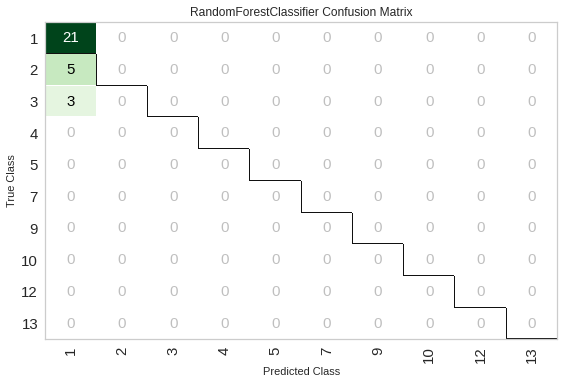

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(rf, plot = 'confusion_matrix')

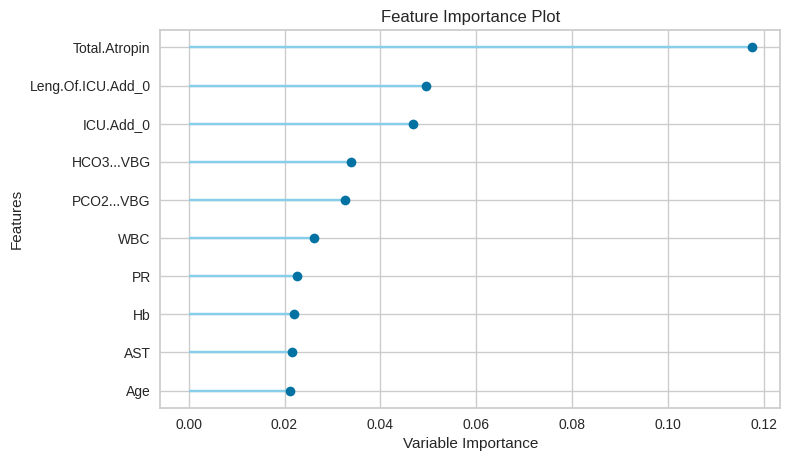

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot = 'feature')

## **Ensembling**

In [ ]:
ada = create_model('ada')
# rf = create_model('rf')
dummy = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
1,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
2,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
3,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
4,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
5,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
6,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
7,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
8,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 6
INFO:logs:DummyClassifier(constant=None, random_state=123, strategy='prior')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
blend = blend_models([ada,rf,dummy])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
1,0.8571,0.0,1.0000,0.8571,0.9231,0.0,0.0
2,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
3,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
4,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
5,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
6,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
7,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0
8,0.7143,0.0,0.3333,0.5102,0.5952,0.0,0.0


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 8
INFO:logs:VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                              

## **evaluate models**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

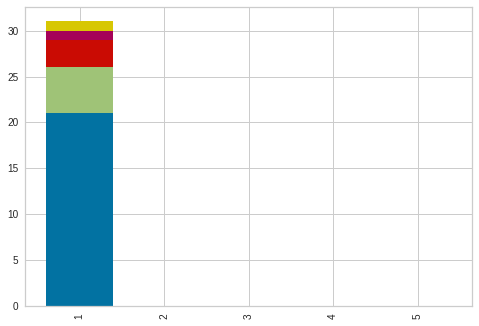

<Figure size 576x396 with 0 Axes>

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


<Figure size 576x396 with 0 Axes>

In [ ]:
evaluate_model(rf)

#** Regression in this data**

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_Total = pd.read_csv("/content/drive/MyDrive/organ_select1.csv")

In [ ]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,222.0,8,1,1,1,10,9,3
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1.0,1,0,0,0,3,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,689.3,12,1,1,1,30,24,0
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,165.6,13,1,1,1,17,14,0
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,20.0,11,0,1,1,11,5,0


In [ ]:
r=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Original Data,"(100, 50)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,30
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 150)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,6.843000e-01,2.186400e+00,1.184900e+00,4.542000e-01,0.2316,2.871000e-01,0.229
huber,Huber Regressor,1.058800e+00,4.490600e+00,1.742500e+00,3.302000e-01,0.3288,4.648000e-01,0.046
gbr,Gradient Boosting Regressor,7.948000e-01,3.337200e+00,1.496900e+00,2.094000e-01,0.2734,3.311000e-01,0.068
br,Bayesian Ridge,1.270200e+00,5.567700e+00,1.941100e+00,1.815000e-01,0.3965,6.273000e-01,0.015
ada,AdaBoost Regressor,7.824000e-01,2.612900e+00,1.344800e+00,1.419000e-01,0.2544,3.145000e-01,0.077
lasso,Lasso Regression,1.392100e+00,6.216600e+00,2.095200e+00,-5.650000e-02,0.4530,7.642000e-01,0.011
lr,Linear Regression,1.333400e+00,3.744800e+00,1.780000e+00,-5.680000e-02,0.4424,9.224000e-01,0.272
en,Elastic Net,1.447700e+00,6.445200e+00,2.190300e+00,-1.286000e-01,0.4723,8.457000e-01,0.012
dt,Decision Tree Regressor,1.061900e+00,6.381000e+00,2.077800e+00,-1.804000e-01,0.3567,3.432000e-01,0.013
lightgbm,Light Gradient Boosting Machine,1.590000e+00,6.174700e+00,2.178500e+00,-1.852000e-01,0.4947,9.527000e-01,0.105


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2229,0.3134,0.5598,0.3602,0.1750,0.0819
1,0.3171,0.1752,0.4186,0.9106,0.1637,0.2646
2,1.0500,3.7606,1.9392,0.6767,0.2684,0.1335
3,0.2957,0.3324,0.5765,0.8267,0.1483,0.1181
4,1.4486,3.3184,1.8217,0.7022,0.3761,0.5756
5,1.6686,8.5776,2.9287,0.4912,0.5393,0.9042
6,0.0886,0.0123,0.1108,0.0000,0.0534,0.0886
7,0.8071,2.8880,1.6994,0.8051,0.2269,0.2362
8,0.8214,2.4304,1.5590,-1.2054,0.3165,0.4196


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


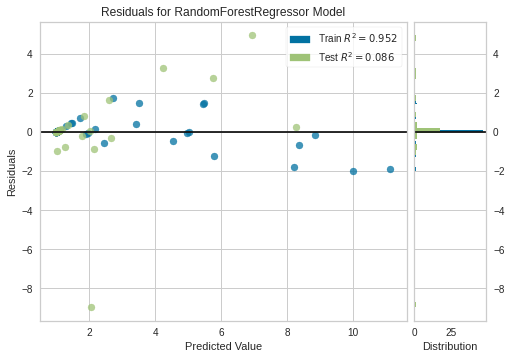

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


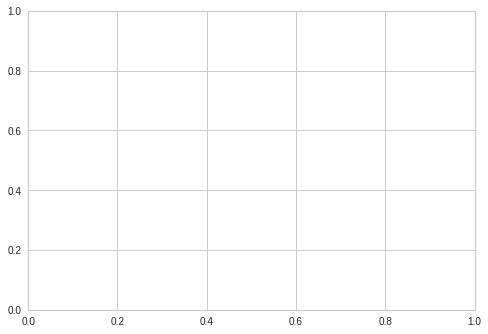

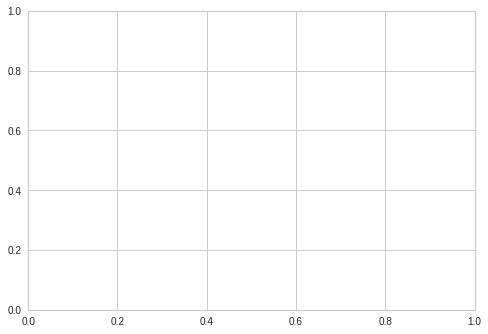

In [ ]:
evaluate_model(rf)